In [12]:
from transformers import AutoImageProcessor, SwinForImageClassification
from sentence_transformers import SentenceTransformer, util
from PIL import Image
import torch
import pandas as pd
from torchvision.transforms import functional as F

In [13]:
categories = [
       'Bags, suitcases and bags: : Rolling suitcase',
       'Clothing, shoes and accessories: Clothes: Outerwear',
       'Electronics and appliances: Appliances: Refrigerator',
       'Furniture and interior: Furniture: Dining table',
       'Furniture and interior: Furniture: Coffee table',
       'Glasses and sunglasses: : Prescription sunglasses',
       'Home, garden and renovation: Garden and outdoor area: Greenhouse',
       'Home, garden and renovation: Garden and outdoor area: Other',
       'Watches: : Analog watch',
       'Electronics and appliances: Games and console: Game console',
       'Art and antiques: : ',
       'Furniture and interior: Furniture: Other',
       'Electronics and appliances: Appliances: Tumble dryer',
       "Baby and children's equipment: : Pram",
       'Home, garden and renovation: Bathroom equipment: Shower cabinet/wall',
       'Electronics and appliances: Various small electronics: Other',
       'Electronics and appliances: Household appliances: Other',
       'Vehicles and accessories: Other: ',
       'Furniture and interior: Furniture: Bed',
       'Electronics and appliances: Household appliances: Vacuum cleaner',
       'Sports and outdoor life: Bicycle and accessories: Bicycle',
       'Electronics and appliances: Mobile phone, tablet and accessories: Tablet',
       'Electronics and appliances: Computers and accessories: Desktop PC',
       'Electronics and appliances: Mobile phone, tablet and accessories: Other',
       'Leisure, hobby and entertainment: : Other',
       'Glasses and sunglasses: : Sunglasses without prescription',
       'Clothing, shoes and accessories: Clothes: Jacket',
       'Electronics and appliances: Appliances: Dishwasher',
       'Bags, suitcases and bags: : Suitcase',
       'Glasses and sunglasses: : Other',
       'Glasses and sunglasses: : Everyday glasses with prescription',
       'Glasses and sunglasses: : Reading glasses',
       'Electronics and appliances: Other: ',
       'Furniture and interior: Other: ',
       'Electronics and appliances: TV and sound: Head-/earphones',
       'Electronics and appliances: Appliances: Washing machine',
       'Home, garden and renovation: Other: ',
       'Electronics and appliances: Computers and accessories: Computer monitor',
       'Furniture and interior: Furniture: Sofa',
       'Electronics and appliances: Appliances: Stove/oven',
       'Watches: : Smartwatch',
       'Electronics and appliances: Mobile phone, tablet and accessories: Mobile phone',
       'Glasses and sunglasses: : Progressive',
       'Electronics and appliances: Appliances: Cooktop',
       'Electronics and appliances: Computers and accessories: Laptop',
       'Electronics and appliances: TV and sound: TV'
]


In [25]:
#Load Data
data = pd.read_csv('/Users/juan.gallego/kami-summer-internship-2023/sampled_df.csv')

image = Image.open("/Users/juan.gallego/kami-summer-internship-2023/668_817979665.jpg")

#Select the column and select the labels in norwegian
labels=list(data.iloc[:,-1].unique())

image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")

model_embedding = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


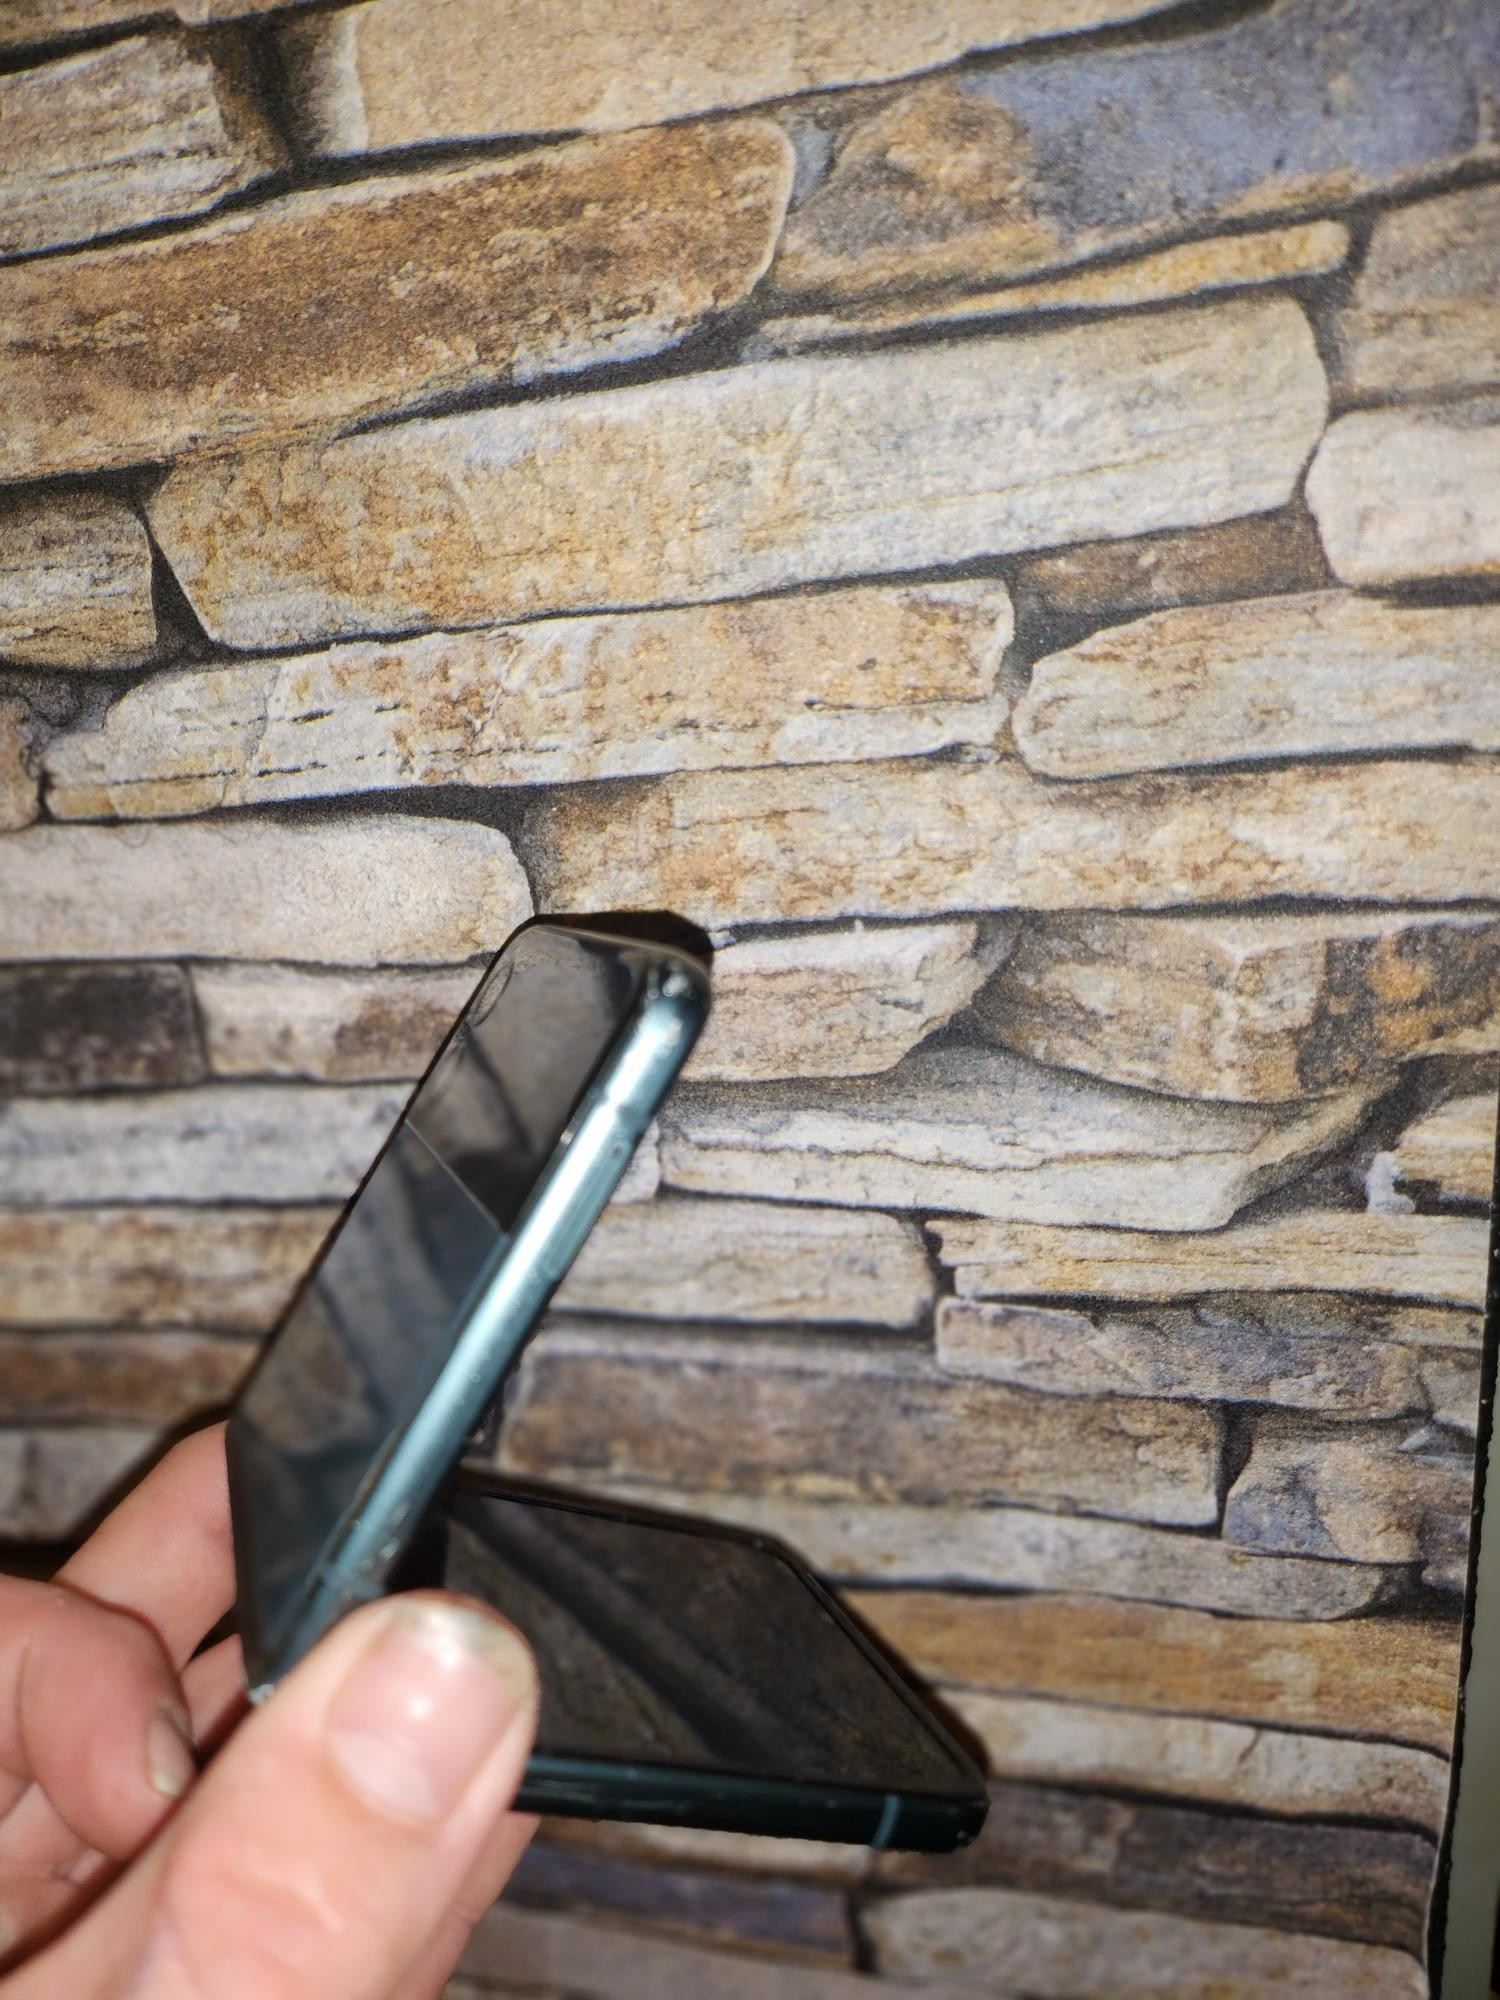

In [26]:
image

In [27]:
def Swin_transformer(image):
    
    inputs = image_processor(image, return_tensors="pt")

    with torch.no_grad():
        outputs = model(**inputs)

    predictions = outputs.logits.softmax(dim=-1)

    predicted_object = model.config.id2label[predictions.argmax(dim=-1).item()]

    return predicted_object



def get_category(text, english_labels, norwegian_labels):

    embeddings_catefories = model_embedding.encode(english_labels, convert_to_tensor=True)
    emebedding_label = model_embedding.encode(text, convert_to_tensor=True)

    cos_sim_emb = util.cos_sim(emebedding_label, embeddings_catefories)

    index_match = torch.topk(cos_sim_emb, k=1).indices.item()

    return norwegian_labels[index_match]

In [28]:
prediction =Swin_transformer(image)

In [29]:
prediction

'cellular telephone, cellular phone, cellphone, cell, mobile phone'

In [30]:
get_category(prediction, categories, labels)

'Elektronikk og hvitevarer: Mobiltelefon, nettbrett og tilbehør: Mobiltelefon'